# Problem Statement

1. The Chicago Crime dataset contains a summary of the reported crimes occured in the city of Chicago from 2001 to 2017.
2. Dataset has been obtained from Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

We will use Facebook PROPHET to predict the crime rate.

Prophet is open source software released by Facebook's Core Data Scientist team.

Prophet is a procedure for forecasting time series data based on the additive model where non-linear treds are fit with yearly,weekly,and daily seasonally, plus holiday effects.

Prophet best works with the time series that have strong effects and several seasons of historical data.


In [1]:
!pip install fbprophet

## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [8]:
chicago_df_1 = pd.read_csv('drive/MyDrive/Predicting Chicago crime/Chicago_Crimes_2005_to_2007.csv',error_bad_lines = False,low_memory = False)
chicago_df_2 = pd.read_csv('drive/MyDrive/Predicting Chicago crime/Chicago_Crimes_2008_to_2011.csv',error_bad_lines = False,low_memory = False)
chicago_df_3 = pd.read_csv('drive/MyDrive/Predicting Chicago crime/Chicago_Crimes_2012_to_2017.csv',error_bad_lines = False,low_memory = False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [9]:
chicago_df_1.shape,chicago_df_2.shape,chicago_df_3.shape

((1872343, 23), (2688710, 23), (1456714, 23))

In [10]:
chicago_df = pd.concat([chicago_df_1,chicago_df_2,chicago_df_3])

In [11]:
chicago_df.shape

(6017767, 23)

## Exploring the dataset

In [12]:
chicago_df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,4,5
ID,4673626,4673627,4673628,4673629,4673630
Case Number,HM274058,HM202199,HM113861,HM274049,HM187120
Date,04/02/2006 01:00:00 PM,02/26/2006 01:40:48 PM,01/08/2006 11:16:00 PM,04/05/2006 06:45:00 PM,02/17/2006 09:03:14 PM
Block,055XX N MANGO AVE,065XX S RHODES AVE,013XX E 69TH ST,061XX W NEWPORT AVE,037XX W 60TH ST
IUCR,2825,2017,051A,0460,1811
Primary Type,OTHER OFFENSE,NARCOTICS,ASSAULT,BATTERY,NARCOTICS
Description,HARASSMENT BY TELEPHONE,MANU/DELIVER:CRACK,AGGRAVATED: HANDGUN,SIMPLE,POSS: CANNABIS 30GMS OR LESS
Location Description,RESIDENCE,SIDEWALK,OTHER,RESIDENCE,ALLEY
Arrest,False,True,False,False,True


In [13]:
chicago_df.isna().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

In [14]:
chicago_df.drop(['Location','Longitude','Latitude','Updated On','Year','Y Coordinate','X Coordinate','FBI Code','Community Area','Ward','District','Beat','Case Number','ID','Unnamed: 0'],axis = 1,inplace = True)

In [15]:
chicago_df.drop('IUCR',axis = 1,inplace = True)

In [16]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
1456709,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [17]:
chicago_df.Date = pd.to_datetime(chicago_df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [18]:
chicago_df.Date

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [19]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [20]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [21]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [22]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [23]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

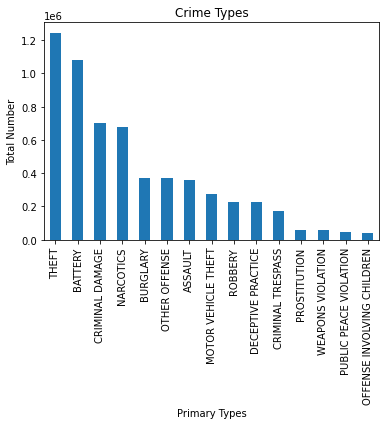

In [24]:
chicago_df['Primary Type'].value_counts().iloc[:15].plot(kind = 'bar')
plt.title('Crime Types')
plt.xlabel('Primary Types')
plt.ylabel('Total Number')
plt.show()

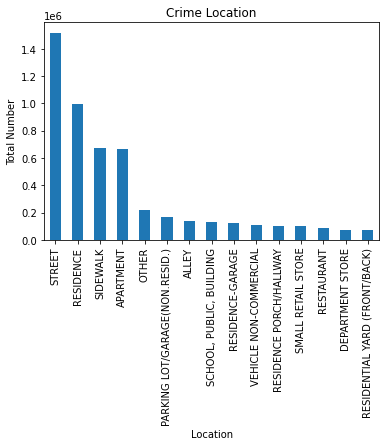

In [25]:
chicago_df['Location Description'].value_counts().iloc[:15].plot(kind = 'bar')
plt.title('Crime Location')
plt.xlabel('Location')
plt.ylabel('Total Number')
plt.show()

In [26]:
chicago_df.resample('Y').size()  # How many crimes in a specific Year

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

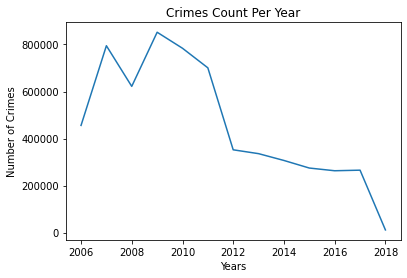

In [27]:
plt.plot(chicago_df.resample('Y').size())
plt.xlabel('Years')
plt.title('Crimes Count Per Year')
plt.ylabel('Number of Crimes')
plt.show()

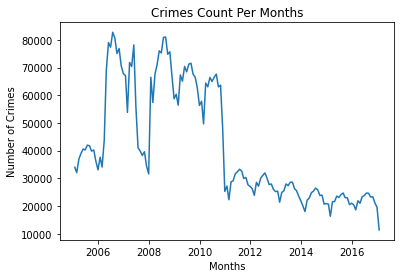

In [28]:
plt.plot(chicago_df.resample('M').size())
plt.xlabel('Months')
plt.title('Crimes Count Per Months')
plt.ylabel('Number of Crimes')
plt.show()

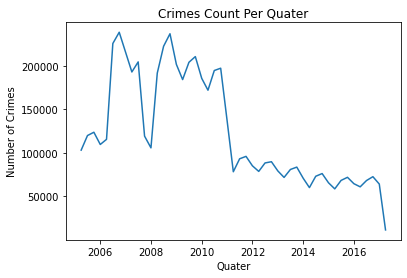

In [29]:
plt.plot(chicago_df.resample('Q').size())
plt.xlabel('Quater')
plt.title('Crimes Count Per Quater')
plt.ylabel('Number of Crimes')
plt.show()

## Preparing the Data

In [30]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [31]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [32]:
chicago_prophet.columns = ['Date','Crime Count']
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [33]:
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Date':'ds','Crime Count':'y'})

In [34]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


## Make Predictions

In [35]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods = 365*2)
forecast = m.predict(future)

In [37]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60463.432502,39098.017095,73114.603399,60463.432502,60463.432502,-4803.616721,-4803.616721,-4803.616721,-4803.616721,-4803.616721,-4803.616721,0.0,0.0,0.0,55659.815781
1,2005-02-28,60332.766196,34118.938201,67922.938453,60332.766196,60332.766196,-9480.730557,-9480.730557,-9480.730557,-9480.730557,-9480.730557,-9480.730557,0.0,0.0,0.0,50852.035639
2,2005-03-31,60188.099929,41864.027746,75767.377012,60188.099929,60188.099929,-1254.934724,-1254.934724,-1254.934724,-1254.934724,-1254.934724,-1254.934724,0.0,0.0,0.0,58933.165205
3,2005-04-30,60048.100316,44723.077203,77597.508045,60048.100316,60048.100316,1114.162021,1114.162021,1114.162021,1114.162021,1114.162021,1114.162021,0.0,0.0,0.0,61162.262337
4,2005-05-31,59903.434049,48354.420798,82839.271011,59903.434049,59903.434049,5396.906083,5396.906083,5396.906083,5396.906083,5396.906083,5396.906083,0.0,0.0,0.0,65300.340133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,2019-01-27,4836.870448,-16483.249031,17002.050255,4319.111522,5325.542420,-4057.336096,-4057.336096,-4057.336096,-4057.336096,-4057.336096,-4057.336096,0.0,0.0,0.0,779.534352
871,2019-01-28,4823.542311,-16205.029833,17309.728816,4304.569803,5312.647682,-4201.459180,-4201.459180,-4201.459180,-4201.459180,-4201.459180,-4201.459180,0.0,0.0,0.0,622.083132
872,2019-01-29,4810.214175,-15870.923207,17342.802531,4290.083096,5299.752945,-4358.275938,-4358.275938,-4358.275938,-4358.275938,-4358.275938,-4358.275938,0.0,0.0,0.0,451.938237
873,2019-01-30,4796.886038,-16671.389662,17369.417226,4275.605866,5286.858208,-4527.427063,-4527.427063,-4527.427063,-4527.427063,-4527.427063,-4527.427063,0.0,0.0,0.0,269.458974


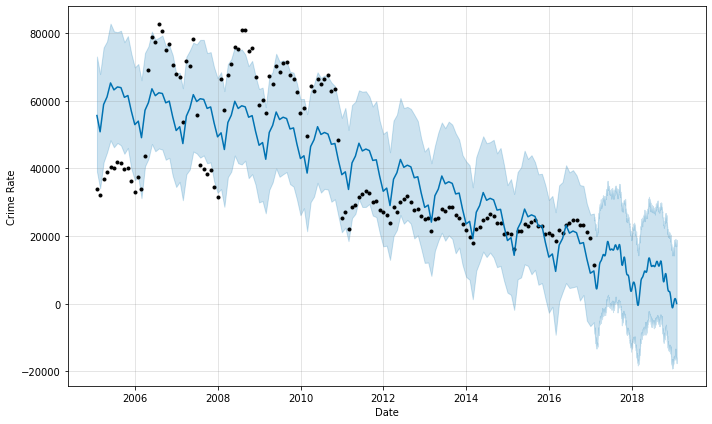

In [38]:
figure = m.plot(forecast,xlabel = 'Date',ylabel = 'Crime Rate')

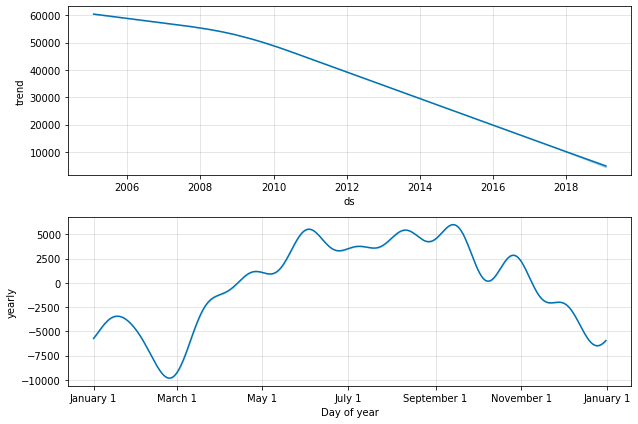

In [39]:
figure = m.plot_components(forecast)